# Business Understanding


In [1]:
import PIL.Image
fp = open("/Users/divyageorge/Desktop/EDS/Covid19_Analysis/notebooks/B.png","rb")
img = PIL.Image.open(fp)
img.show()

## Aim of the project
To graphically represent the spread of corona virus in various countries and the no.of vaccinated people
### To Consider:

1. Use the covid cases data from John Hopkins dataset (https://github.com/CSSEGISandData/COVID-19.git)
2. Use vaccination data from Johns Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
    (https://github.com/govex/COVID-19/tree/master/data_tables/vaccine_data/global_data)

3. Use the population data(2018) from  Johns Hopkins Centers for Civic Impact for the Coronavirus Resource Center (CRC)
(https://github.com/govex/COVID-19/blob/master/data_tables/world_pop_by_country.csv) 

## Data Understanding

In [2]:
import pandas as pd
pd.set_option('display.max_rows',1000)

import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from os.path import dirname as pDir
from os.path import join as pJoin


In [3]:
url="https://covid.ourworldindata.org/data/owid-covid-data.csv" 

In [4]:
df_basic=pd.read_csv(url)

In [5]:
df_basic

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197460,ZWE,Africa,Zimbabwe,2022-06-24,255309.0,173.0,79.429,5549.0,7.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197461,ZWE,Africa,Zimbabwe,2022-06-25,255309.0,0.0,79.429,5549.0,0.0,2.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197462,ZWE,Africa,Zimbabwe,2022-06-26,255355.0,46.0,79.143,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
197463,ZWE,Africa,Zimbabwe,2022-06-27,255383.0,28.0,78.857,5549.0,0.0,2.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [6]:
df_basic.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
df_basic['location'].unique()


array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [8]:
gg=df_basic['location']=='Georgia'
gc=df_basic['location']=='Greece'
gd=df_basic['location']=='Greenland'
g=gg|gc|gd
df_intermediate=df_basic[g]
df_intermediate=df_intermediate.reset_index(drop=True)
df_intermediate

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,GEO,Asia,Georgia,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,5.3,55.5,NaN,2.6,73.77,0.812,NaN,NaN,NaN,NaN
1,GEO,Asia,Georgia,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,5.3,55.5,NaN,2.6,73.77,0.812,NaN,NaN,NaN,NaN
2,GEO,Asia,Georgia,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,5.3,55.5,NaN,2.6,73.77,0.812,NaN,NaN,NaN,NaN
3,GEO,Asia,Georgia,2020-02-29,1.0,0.0,NaN,NaN,NaN,NaN,...,5.3,55.5,NaN,2.6,73.77,0.812,304.8,3.6,6.72,76.587283
4,GEO,Asia,Georgia,2020-03-01,3.0,2.0,NaN,NaN,NaN,NaN,...,5.3,55.5,NaN,2.6,73.77,0.812,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,GRL,North America,Greenland,2022-06-24,11971.0,0.0,0.0,21.0,0.0,0.0,...,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,NaN,NaN
2542,GRL,North America,Greenland,2022-06-25,11971.0,0.0,0.0,21.0,0.0,0.0,...,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,NaN,NaN
2543,GRL,North America,Greenland,2022-06-26,11971.0,0.0,0.0,21.0,0.0,0.0,...,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,NaN,NaN
2544,GRL,North America,Greenland,2022-06-27,11971.0,0.0,0.0,21.0,0.0,0.0,...,NaN,NaN,NaN,NaN,71.70,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

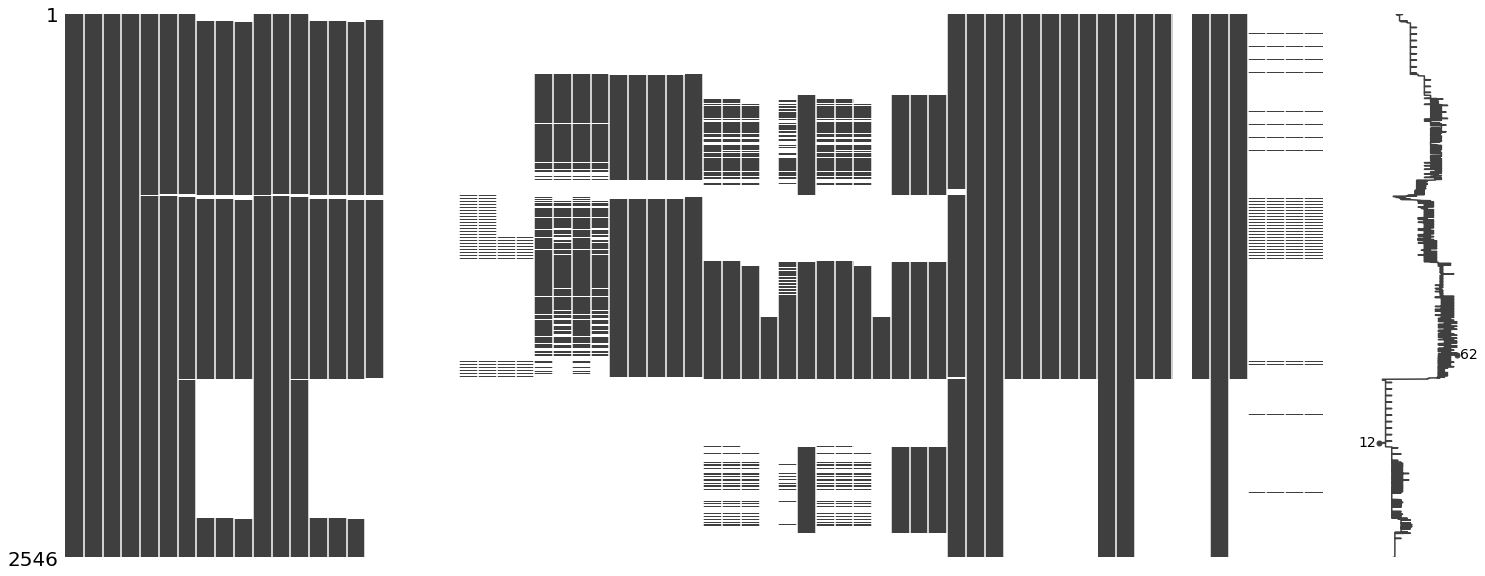

In [9]:
import missingno as msno
msno.matrix(df_intermediate)

In [10]:
df_intermediate.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

<AxesSubplot:>

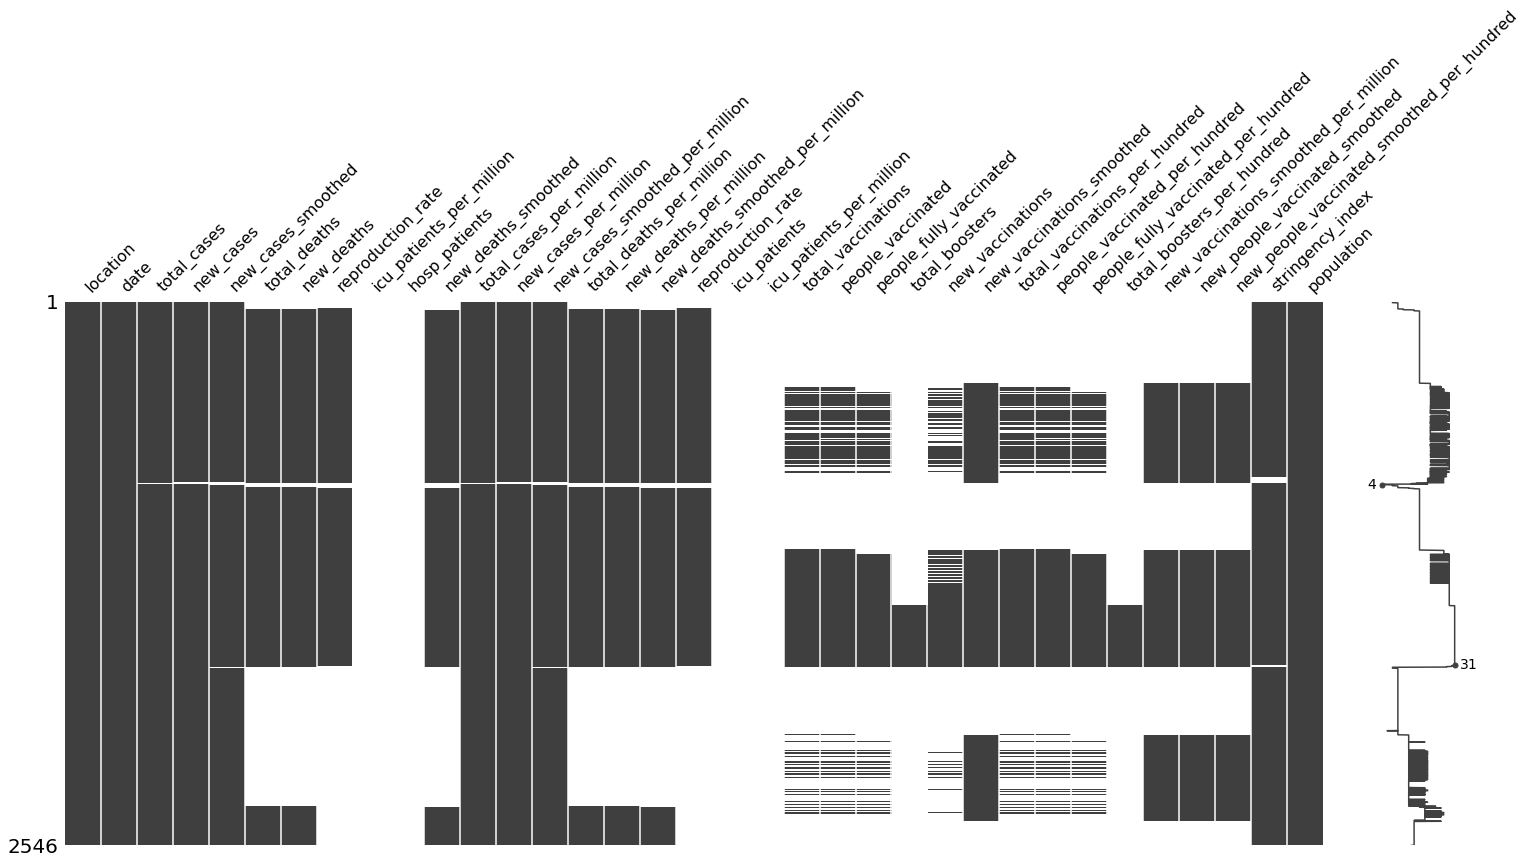

In [11]:
msno.matrix(df_intermediate[['location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths', 'reproduction_rate',
        'icu_patients_per_million', 'hosp_patients',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people_vaccinated_smoothed',
       'new_people_vaccinated_smoothed_per_hundred', 'stringency_index',
       'population'
]])

## Graphical Illustration of Data

In [29]:
# from plotly website directly, replace with code from class
import plotly.express as px

fig = px.line(df_intermediate, x="date", y="total_cases", color='location', title='Covid Cases Reported')


In [13]:
df_intermediate['total_cases']=df_intermediate['total_cases']/df_intermediate['population']
fig = px.line(df_intermediate, x="date", y="total_cases", color='location', title='Covid Cases Reported')
fig.show()

In [22]:
fig = px.line(df_intermediate, x="date", y="people_vaccinated", color='location', title='No.of People vaccinated')
fig.show()

In [25]:
df_intermediate['people_fully_vaccinated_per_hundred']=df_intermediate['people_fully_vaccinated']/df_intermediate['population']


In [27]:
fig = px.line(df_intermediate, x="date", y="people_fully_vaccinated_per_hundred", color='location', title='People Fully Vaccinated ')
fig.show()

In [28]:
df_intermediate['total_boosters']=df_intermediate['total_boosters']/df_intermediate['population']
fig = px.line(df_intermediate, x="date", y="total_boosters", color='location', title='Boostered People')
fig.show()